In [1]:
### Run this worksheet TENTH in sequence.

# This worksheet assigns the results of the PCA from the ninth worksheet to clusters using the K-Nearest-Neighbors (KNN)
# algorithm and then optimizes the hyperparameters of the KNN based on the resulting silhouette scores.

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from pylab import rcParams
from matplotlib import pyplot as plt
import numpy as np

rcParams['figure.figsize'] = 16, 8

data = pd.read_csv('Modified_Data/PCA_yes.csv')

In [2]:
# Relabel the PCA matrix for convenience.
data.columns = ['name', 'x', 'y']
data.head()

,name,x,y
0,AFG,-17.318236,-3.631895
1,AGO,-2.931285,-14.299369
2,ALB,8.851835,5.200477
3,AND,33.924740,1.064946
4,ARE,-16.635689,-6.850127


In [3]:
num_data = data.drop('name', axis=1)
num_data.head()

,x,y
0,-17.318236,-3.631895
1,-2.931285,-14.299369
2,8.851835,5.200477
3,33.924740,1.064946
4,-16.635689,-6.850127


In [4]:
# Assign each point in the PCA matrix to one of 3 clusters
# 3 is an arbitrary number chosen for convenience in testing.

model3 = KMeans(n_clusters=3)
model3.fit(num_data)
results = model3.predict(num_data)
results_df = pd.DataFrame(results)
results_df.head()

,0
0,0
1,0
2,2
3,1
4,0


In [5]:
# Add cluster assignments to the PCA matrix of yes votes.

data['cluster'] = results_df.loc[:, 0]
data.head()

,name,x,y,cluster
0,AFG,-17.318236,-3.631895,0
1,AGO,-2.931285,-14.299369,0
2,ALB,8.851835,5.200477,2
3,AND,33.924740,1.064946,1
4,ARE,-16.635689,-6.850127,0


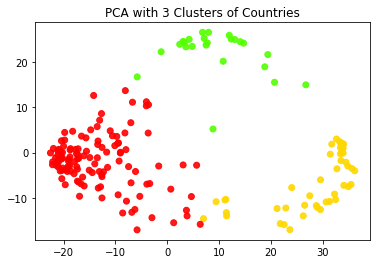

In [6]:
# Convert the numpy PCA array to a Pandas Dataframe and add the cluster predictions as color codes

plt.scatter(data['x'], data['y'], c=data['cluster'], alpha=0.9, cmap='prism')
plt.title('PCA with 3 Clusters of Countries')
plt.show()

Automatically created module for IPython interactive environment
('For n_clusters =', 2, 'The average silhouette_score is :', 0.593839363523831)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.6437399459418159)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.5905027291521668)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.540097141148756)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.5135238884051768)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.5168504330078274)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.5074731031409544)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.4680267053571637)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.4664332206493598)


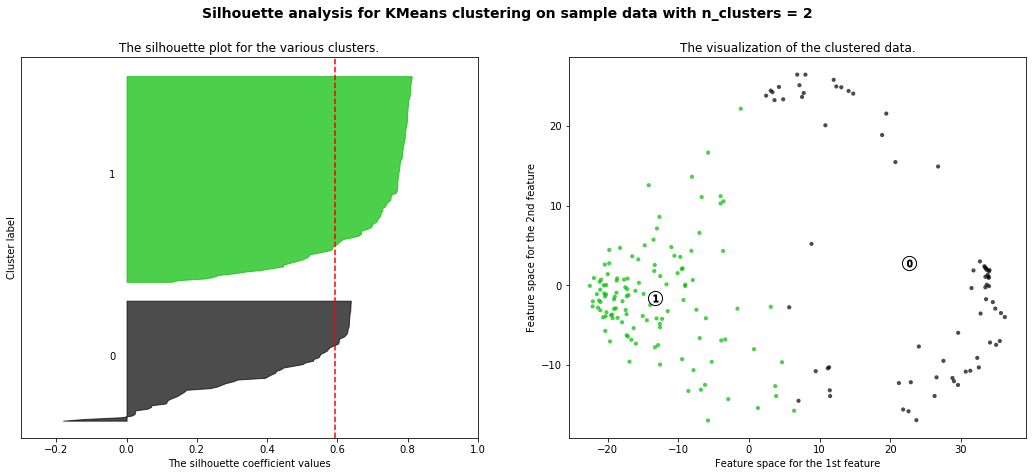

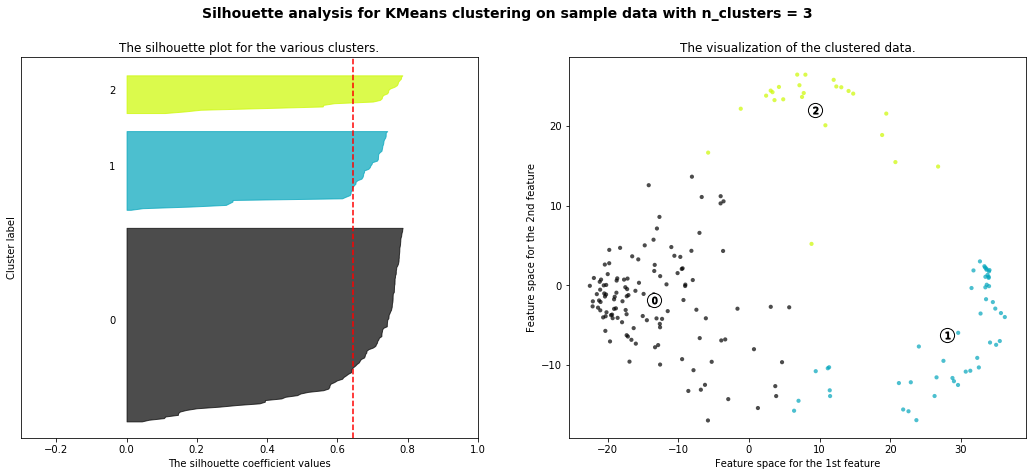

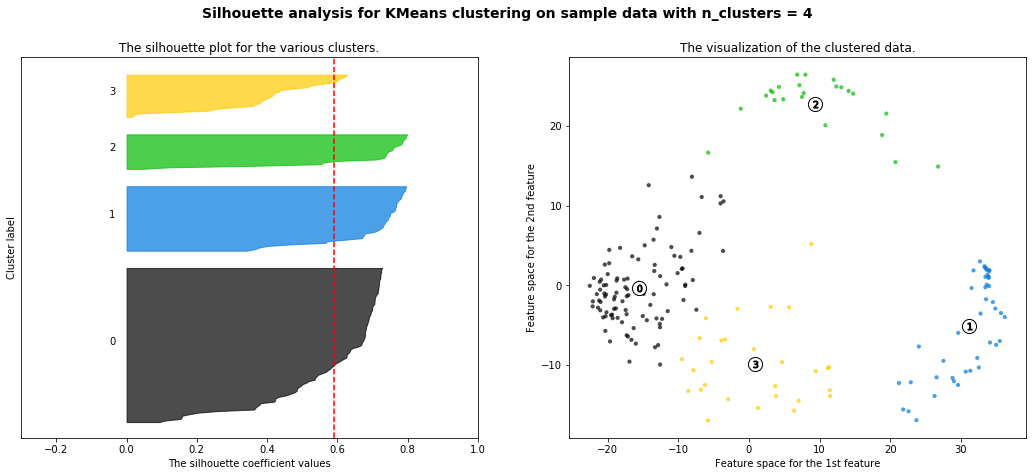

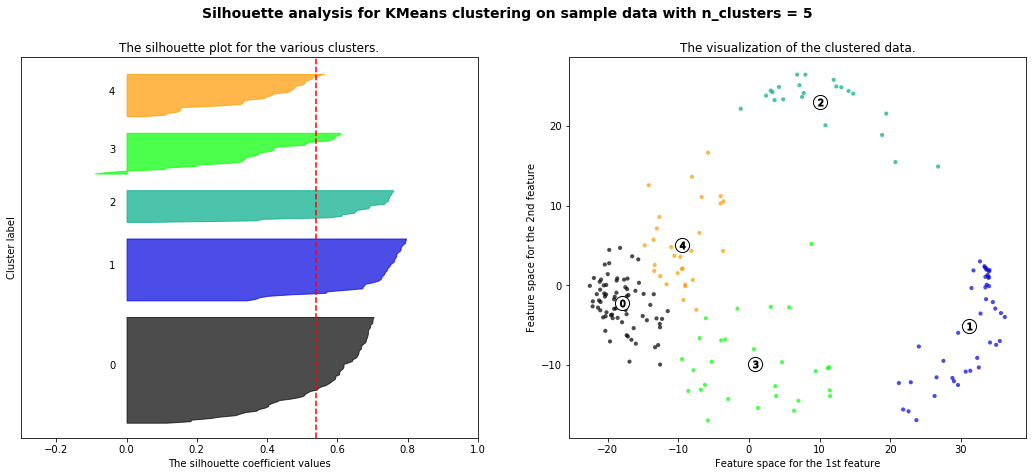

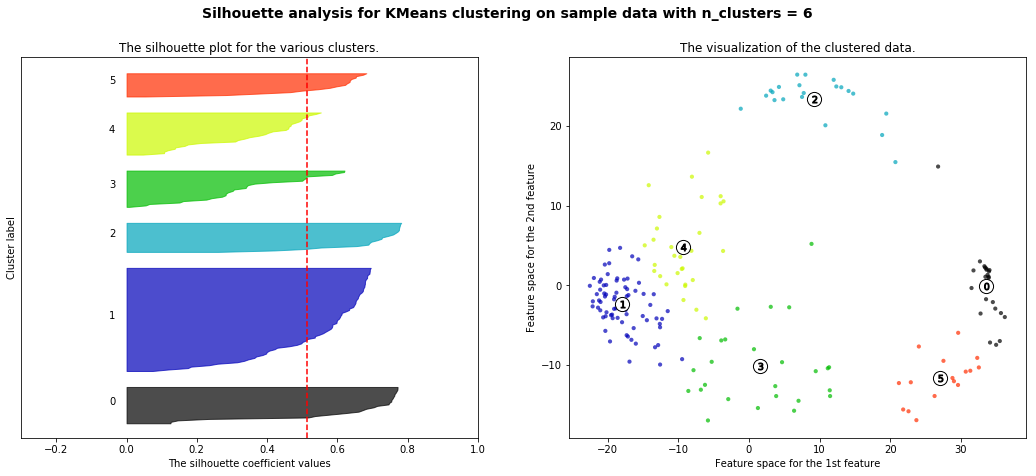

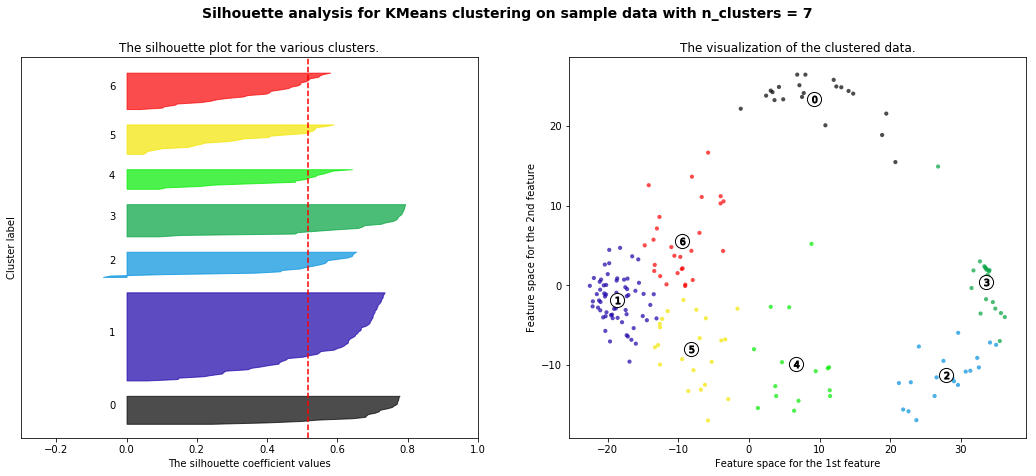

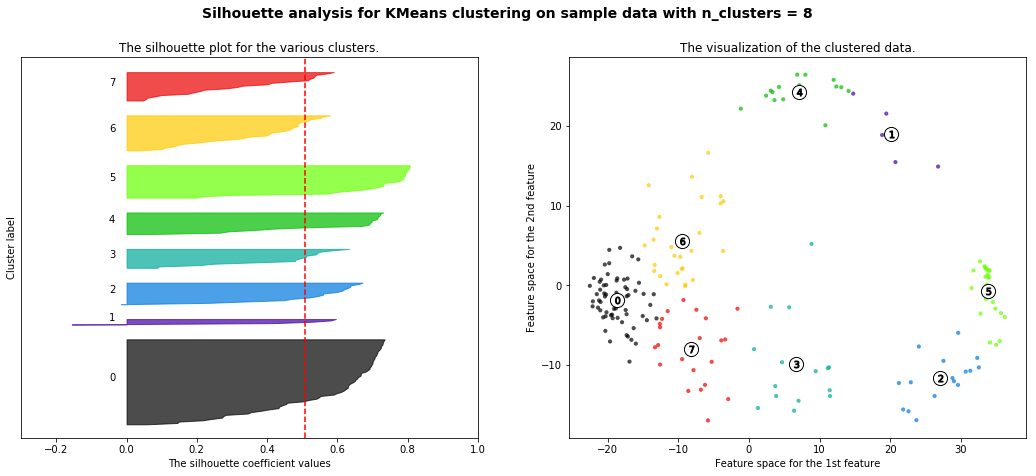

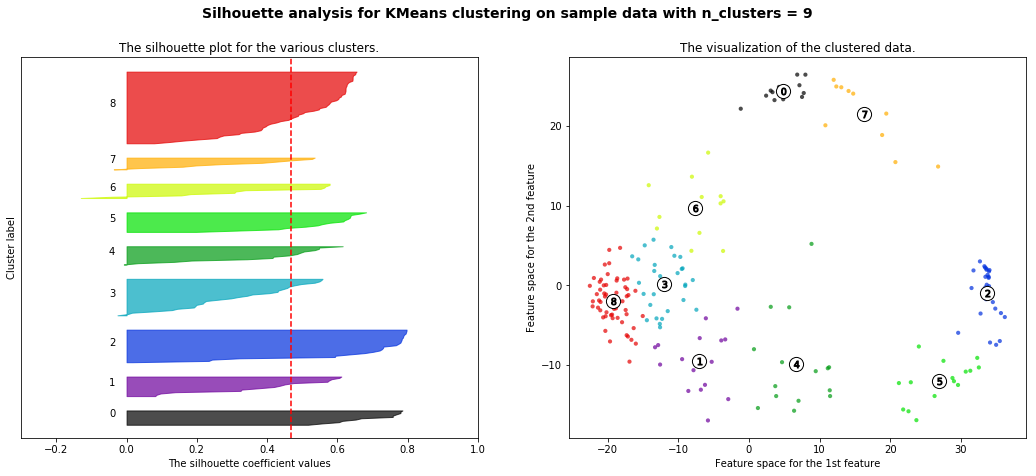

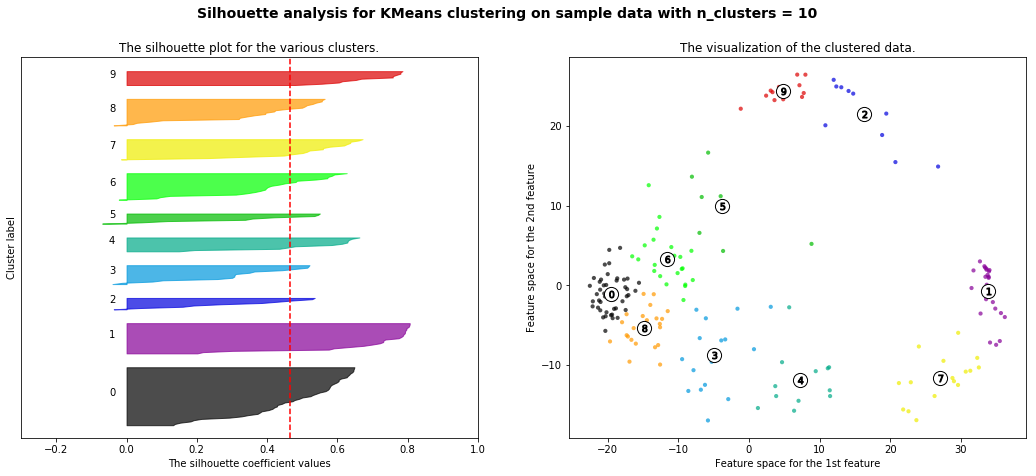

In [7]:
# Test all possible numbers of clusters from 2 through 10, and assess their silhouette scores both quantitatively 
# and visually, using the silhouette graphs.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
X = num_data

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    vote_x = num_data['x']
    vote_y = num_data['y']
    ax2.scatter(vote_x, vote_y, marker='.', s=70, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The silhouette score for yes votes was highest at 3 clusters, at 0.64. My initial selection of 3 clusters for testing was a lucky guess! The silhouette score drops in both directions, so there is no need to conduct further testing to identify the correct number of clusters for this matrix. The next step is to test the PCA matrix of 'no' votes using a similar method.

In [8]:
no_votes = pd.read_csv('Modified_Data/PCA_no.csv')

no_votes.columns = ['name', 'x', 'y']
no_votes.head()

,name,x,y
0,AFG,-7.387532,1.127967
1,AGO,-5.153308,1.529143
2,ALB,14.158133,2.970287
3,AND,3.072608,-14.060429
4,ARE,-8.543004,0.352264


In [9]:
num_no_votes = no_votes.drop('name', axis=1)
num_no_votes.head()

,x,y
0,-7.387532,1.127967
1,-5.153308,1.529143
2,14.158133,2.970287
3,3.072608,-14.060429
4,-8.543004,0.352264


('For n_clusters =', 2, 'The average silhouette_score is :', 0.5841600838450384)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.5689455209338703)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.5650574554931709)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.5583122368480188)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.5585328364663417)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.5007905576533164)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.5043724111979094)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.4982328556405811)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.5013791423794668)


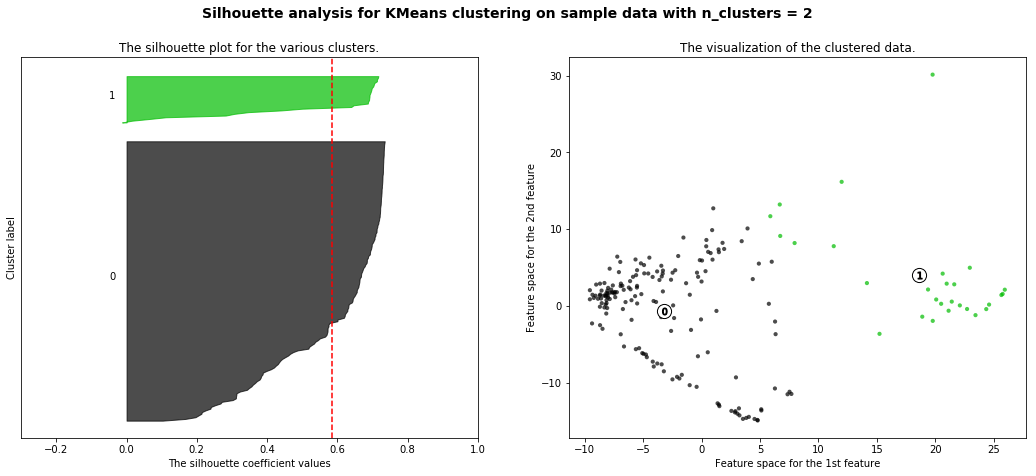

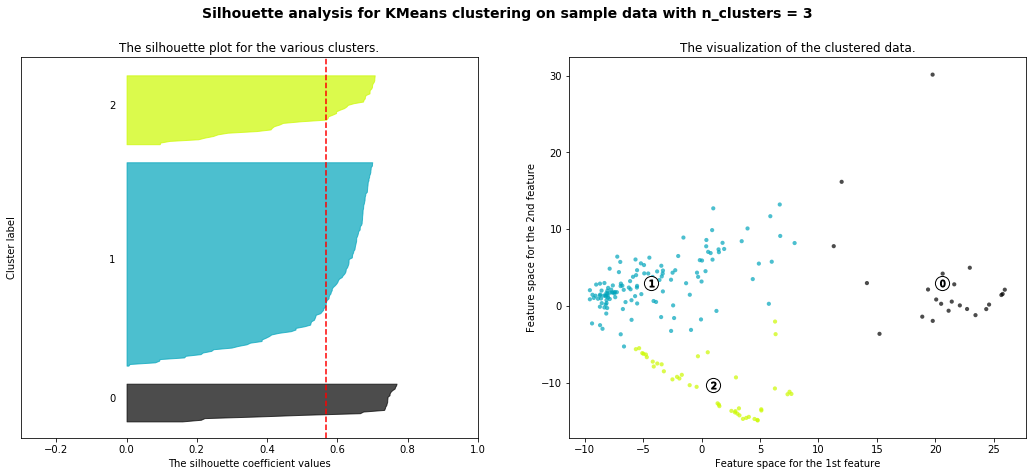

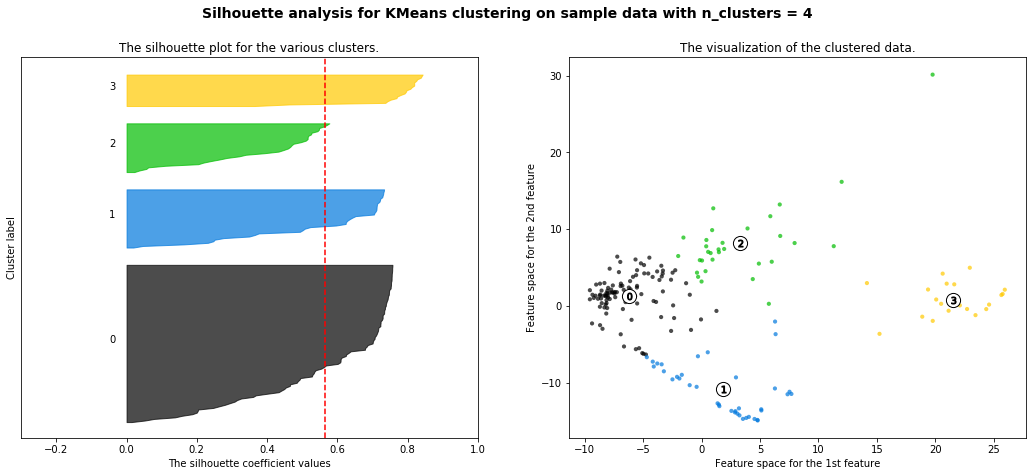

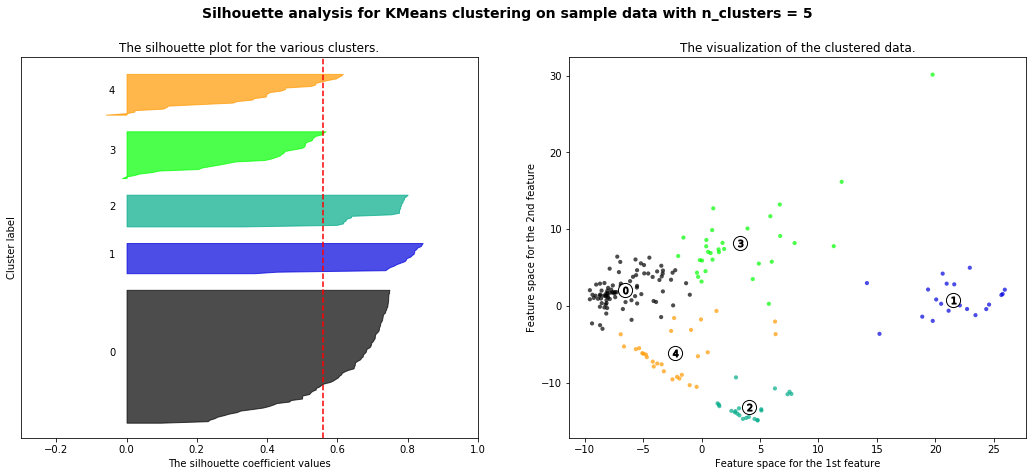

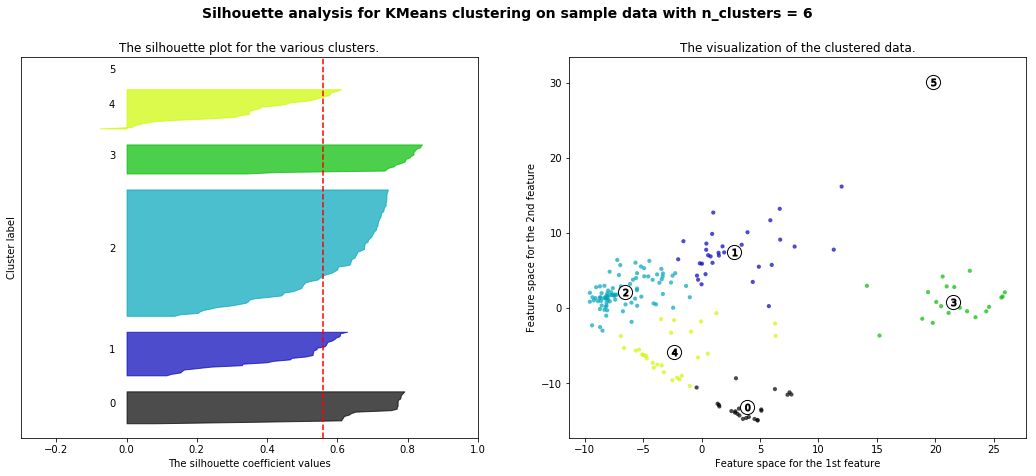

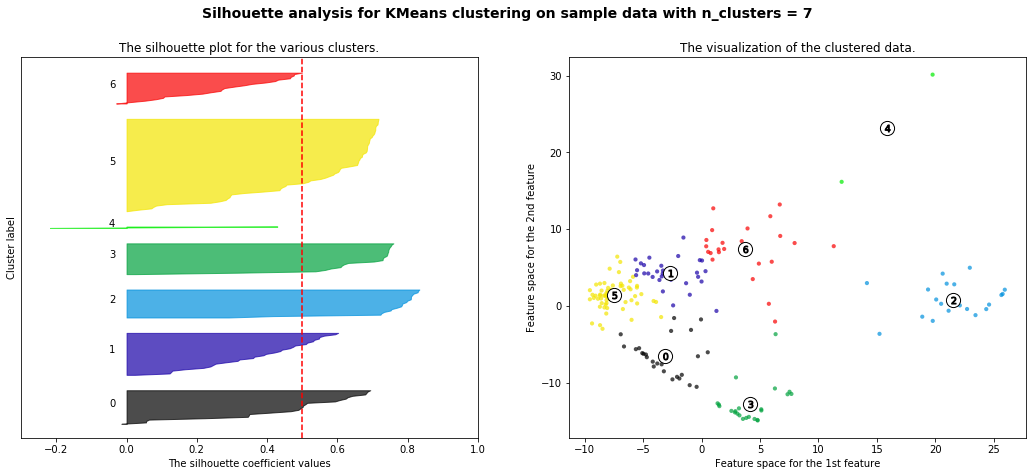

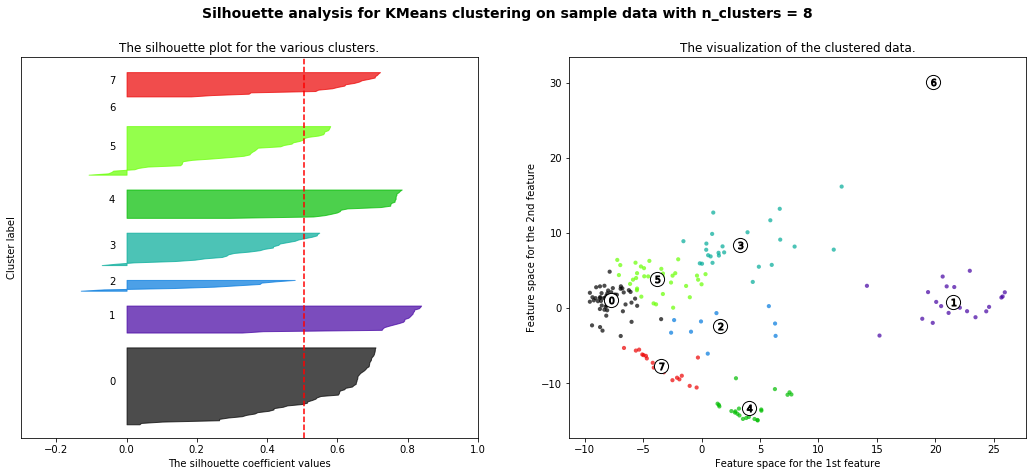

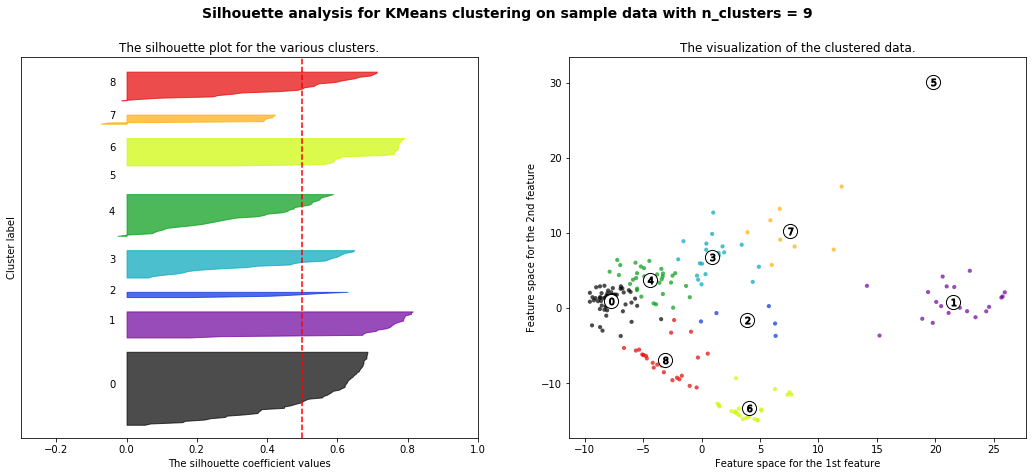

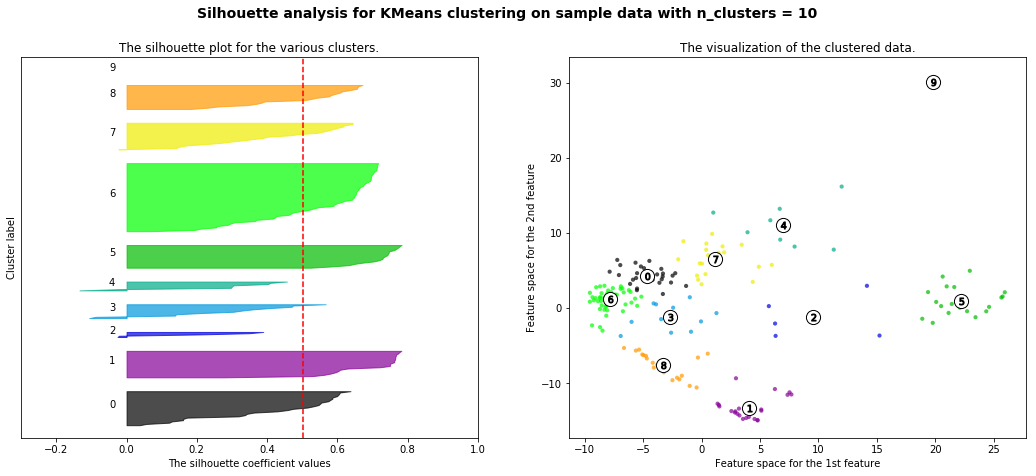

In [10]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
X = num_no_votes

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    vote_x = num_no_votes['x']
    vote_y = num_no_votes['y']
    ax2.scatter(vote_x, vote_y, marker='.', s=70, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Although the PCA matrix of no votes was sparser, it was not as compelling in terms of the structure of its clusters. The maximum silhouette score was only 0.58 (less than the 0.64 from the yes votes), and this score was obtained with only 2 clusters (at the extreme end of the range), with many of the points in the second cluster being very weak fits for that cluster. The cluster analysis therefore suggests that it is more appropriate to use the PCA matrix of yes votes.